In [25]:
#numpy for manipulation number of layer and handel encoding 
import numpy as np

#all magic start here hehhe
import face_recognition as fc

#also open cv for takel the image
import cv2 
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageDraw
%matplotlib inline

# load image 

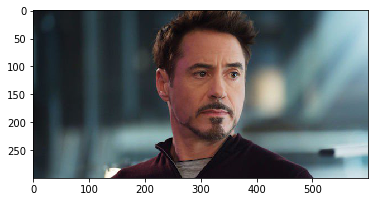

In [26]:
tony = fc.load_image_file('dataset/tony-stark.jpg')
plt.imshow(tony)

# le't get face location of mr tony 

In [27]:
face_location = fc.face_locations(tony)
print(face_location)

[(64, 408, 219, 253)]


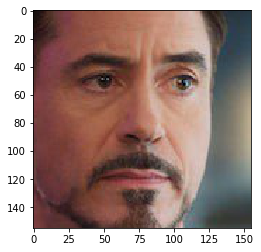

In [28]:
for face in face_location:
    top, right, bottom, left = face
    face_image = tony[top:bottom, left:right]
    plt.imshow(face_image)

# lets give tony landmark face

we will predict the facial landmark tony face

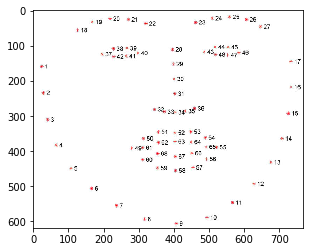

In [29]:
plt.imshow(fc.load_image_file('dataset/facial_landmarks.jpg'))

In [30]:
face_landmarks = fc.face_landmarks(tony)
for face_landmarks in face_landmarks:
    print(face_landmarks)

{'chin': [(247, 116), (247, 135), (247, 155), (250, 174), (258, 191), (270, 206), (287, 218), (305, 228), (325, 230), (343, 229), (356, 218), (366, 204), (372, 188), (376, 171), (378, 154), (379, 136), (380, 120)], 'left_eyebrow': [(273, 106), (284, 98), (297, 94), (311, 95), (324, 99)], 'right_eyebrow': [(342, 98), (353, 94), (363, 93), (373, 96), (377, 105)], 'nose_bridge': [(333, 111), (334, 123), (335, 134), (335, 146)], 'nose_tip': [(318, 157), (325, 159), (332, 161), (338, 160), (343, 158)], 'left_eye': [(288, 116), (296, 112), (305, 111), (311, 116), (304, 119), (296, 119)], 'right_eye': [(345, 116), (353, 112), (361, 112), (365, 116), (360, 120), (353, 119)], 'top_lip': [(302, 183), (313, 180), (323, 179), (330, 181), (337, 179), (343, 181), (349, 184), (346, 184), (337, 184), (330, 185), (322, 184), (306, 184)], 'bottom_lip': [(349, 184), (343, 189), (337, 191), (330, 191), (322, 191), (313, 189), (302, 183), (306, 184), (322, 183), (330, 184), (337, 183), (346, 184)]}


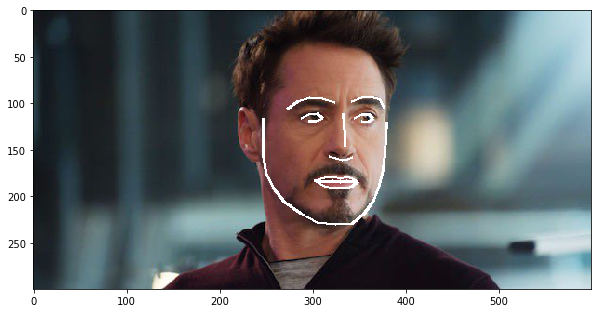

In [34]:
face_landmarks = fc.face_landmarks(tony)

pil_image = Image.fromarray(tony)
d = ImageDraw.Draw(pil_image)
for face_landmarks in face_landmarks:

    # Print the location of each facial feature in this image
#     for facial_feature in face_landmarks.keys():
#         print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, )

# Show the picture
plt.figure(figsize=(10,8))
plt.imshow(pil_image)

(150, 300, 3)
A face is located at pixel location Top: 30, Left: 129, Bottom: 105, Right: 204


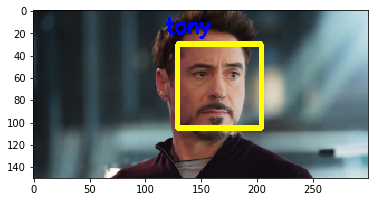

In [38]:
img = fc.load_image_file('dataset/tony-stark.jpg')

# resize image 50%
reshape_img = cv2.resize(img,(int(img.shape[1]/2), int(img.shape[0]/2)) )
print(reshape_img.shape)

face_locations = fc.face_locations(reshape_img)
gambar = []
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # cv2.rectangle(image, (left_top_coordinate), (right_bottom_coordinate), (color), line_width)
    cv2.rectangle(reshape_img, (left, top), (right, bottom), (255, 255, 0), 3)
    
    # display text
    # cv2.putText(image, text, bottom_left_corner, font, font_scale, font_color, line_type)
    cv2.putText(reshape_img, 'tony', (left-10, top-10),  cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

plt.imshow(reshape_img)